<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

# 실습 내용

- 임으로 만든 데이터로 모델링합니다.
- Linear Regression, Ridge, Lasso, Elasticnet 알고리즘으로 모델링합니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) x, y 분리**

In [2]:
# 데이터 만들기
from sklearn.datasets import make_regression
x, y, c = make_regression(n_samples=1000, n_features=500, bias=1, noise=35.0, coef=True, random_state=1)

**2) 학습용, 평가용 데이터 분리**

In [3]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

**3) 정규화**

In [ ]:
# 모듈 불러오기
#from sklearn.preprocessing import MinMaxScaler

# 정규화
#scaler = MinMaxScaler()
#scaler.fit(x_train)
#x_train= scaler.transform(x_train)
#x_test= scaler.transform(x_test)

# 4.모델링

- 본격적으로 모델을 선언하고 학습하고 평가하는 과정을 진행합니다.

## 4.1.Linear Regression

- 우선 Linear Regression 알고리즘으로 모델링합니다.

$$ \large cost=\sum_{i=1}^{n}(y_i-\hat y)^2 $$

In [4]:
# 1단계: 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

model = LinearRegression()
model.fit(x_train, y_train)

print('학습성능:', model.score(x_train, y_train))
print('평가성능:', model.score(x_test, y_test))

학습성능: 0.9854289638092493
평가성능: 0.7668772922110056


- 변수들의 가중치를 확인해 보면 모든 변수의 가중치가 존재함을 알 수 있습니다.

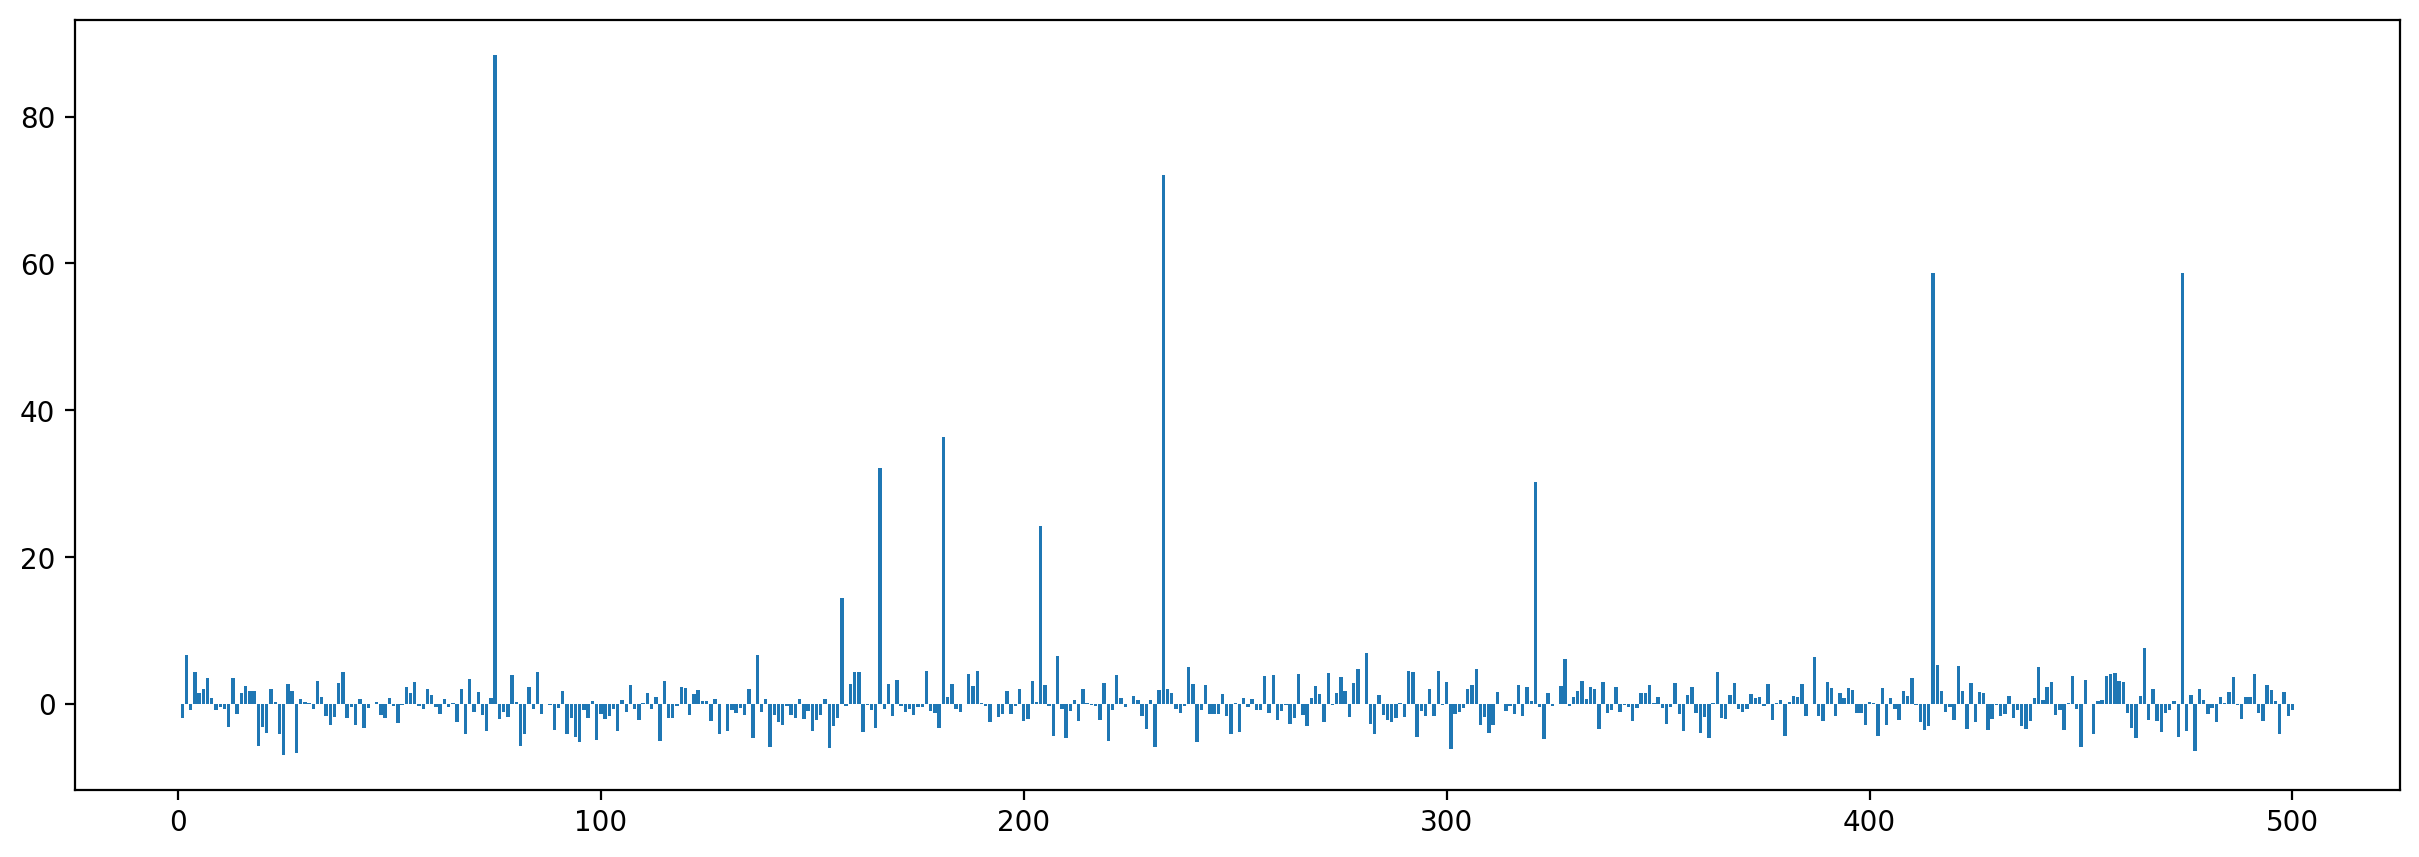

In [5]:
# 가중치 시각화 
plt.figure(figsize=(15, 5))
plt.bar(x=range(1, 501), height=model.coef_)
plt.show()

## 4.2.Ridge

- Ridge 알고리즘을 사용하면 변수들의 가중치 크기를 제어할 수 있습니다.
- 그렇다고 특정 변수의 가중치를 0으로 바꾸지는 않습니다.

$$ \large cost=\sum_{i=1}^{n}(y_i-\hat y)^2+\lambda\sum_{j=1}^{p}(w_j)^2 $$

In [ ]:
# 모델링
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score

model = Ridge(alpha=20)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# 성능 확인
print('학습성능:', model.score(x_train, y_train))
print('평가성능:', model.score(x_test, y_test))

- RidgeCV를 사용하면 주어진 범위 내에서 최선의 파라미터 값을 찾을 수 있습니다.

In [ ]:
# 모델링(Ridge CV)
from sklearn.linear_model import RidgeCV

alpha = np.linspace(0.1, 30, 20)
model = RidgeCV(alphas=alpha, cv=5)
model.fit(x_train, y_train)

# 성능 확인
print('학습성능:', model.score(x_train, y_train))
print('평가성능:', model.score(x_test, y_test))
print('-' * 28)
print('alpha:', model.alpha_)

- 변수들의 가중치를 확인해 보면 변수들 가중치가 기존보다 줄어든 것을 알 수 있습니다.

In [ ]:
# 가중치 시각화 
plt.figure(figsize=(15, 5))
plt.bar(x=range(1, 501), height=model.coef_)
plt.show()

## 4.2.Lasso

- Lasso 알고리즘을 사용하면 중요하지 않은 변수의 가중치를 0으로 바꿀 수 있습니다.
- 이를 통해 불필요한 변수들을 제거할 수 있습니다. 

$$ \large cost=\sum_{i=1}^{n}(y_i-\hat y)^2+\lambda\sum_{j=1}^{p}|w_j| $$

In [ ]:
# 모델링
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score

model = Lasso(alpha=0.01)
model.fit(x_train, y_train)

# 성능 확인
print('학습성능:', model.score(x_train, y_train))
print('평가성능:', model.score(x_test, y_test))

- LassoCV를 사용하면 주어진 범위 내에서 최선의 파라미터 값을 찾을 수 있습니다.

In [ ]:
# 모델링(LassoCV)
from sklearn.linear_model import LassoCV

alpha = np.linspace(0.1, 10, 50)
model = LassoCV(alphas=alpha, cv=5, random_state=1)
model.fit(x_train, y_train)

# 성능 확인
print('학습성능:', model.score(x_train, y_train))
print('평가성능:', model.score(x_test, y_test))
print('-' * 28)
print('alpha:', model.alpha_)

- 변수들의 가중치를 확인해 보면 일부 변수들을 제외한 나머지 변수들의 가중치가 제거됨을 알 수 있습니다.

In [ ]:
# 가중치 시각화 
plt.figure(figsize=(15, 5))
plt.bar(x=range(1, 501), height=model.coef_)
plt.show()

## 4.3.ElasticNet

- Elasticnet 알고리즘을 사용하면 Ridge와 Lasso 기능을 같이 사용할 수 있습니다.

$$ \large cost=\sum_{i=1}^{n}(y_i-\hat y)^2+\gamma\lambda\sum_{j=1}^{p}|w_j|+\frac{1-\gamma}{2}\lambda\sum_{j=1}^{p}(w_j)^2 $$

In [ ]:
# 모델링
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, r2_score

model = ElasticNet(alpha=0.01, l1_ratio=0.5)
model.fit(x_train, y_train)

# 성능 확인
print('학습성능:', model.score(x_train, y_train))
print('평가성능:', model.score(x_test, y_test))

- ElasticNetCV를 사용하면 주어진 범위 내에서 최선의 파라미터 값을 찾을 수 있습니다.

In [ ]:
# 모델링(ElasticNetCV)
from sklearn.linear_model import ElasticNetCV

l1 = np.linspace(0.1, 1, 10)                         
alpha = np.linspace(0.1, 10, 50)
model = ElasticNetCV(l1_ratio=l1, alphas=alpha, cv=5, random_state=1)
model.fit(x_train, y_train)

# 성능 확인
print('학습성능:', model.score(x_train, y_train))
print('평가성능:', model.score(x_test, y_test))
print('-' * 28)
print('l1_ratio:', model.l1_ratio_)
print('alpha:', model.alpha_)

- 변수들의 가중치를 확인해 보면 모든 변수의 가중치가 줄었거나 제거됨을 알 수 있습니다.
- 본 예제에서는 Lasso와 같은 결과를 보여줍니다.

In [ ]:
# 가중치 시각화 
plt.figure(figsize=(15, 5))
plt.bar(x=range(1, 501), height=model.coef_)
plt.show()